<a href="https://colab.research.google.com/github/abhijith4126/PROJECT/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  sentiment                                         clean_text
0   neutral                @VirginAmerica What @dhepburn said.
1  positive  @VirginAmerica plus you've added commercials t...
2   neutral  @VirginAmerica I didn't today... Must mean I n...
3  negative  @VirginAmerica it's really aggressive to blast...
4  negative  @VirginAmerica and it's a really big bad thing...


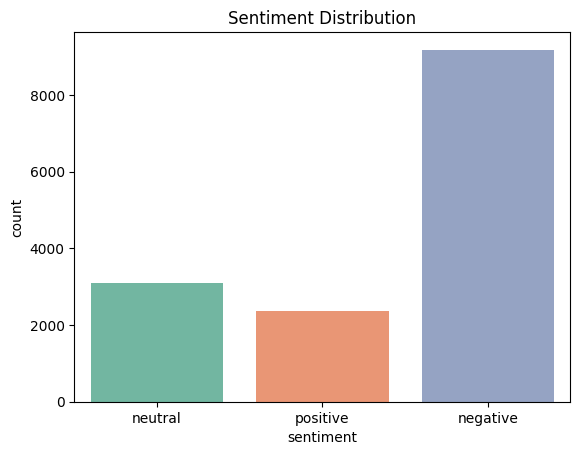

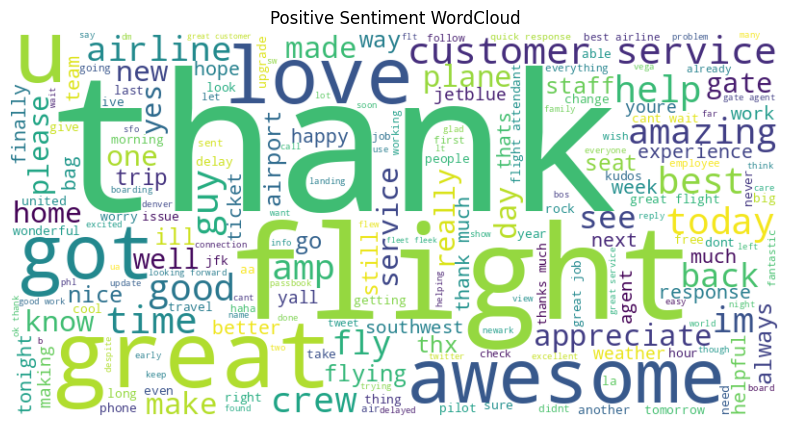

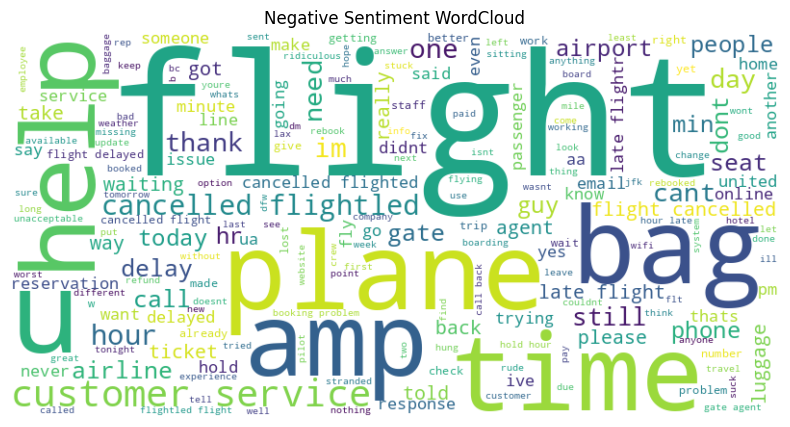

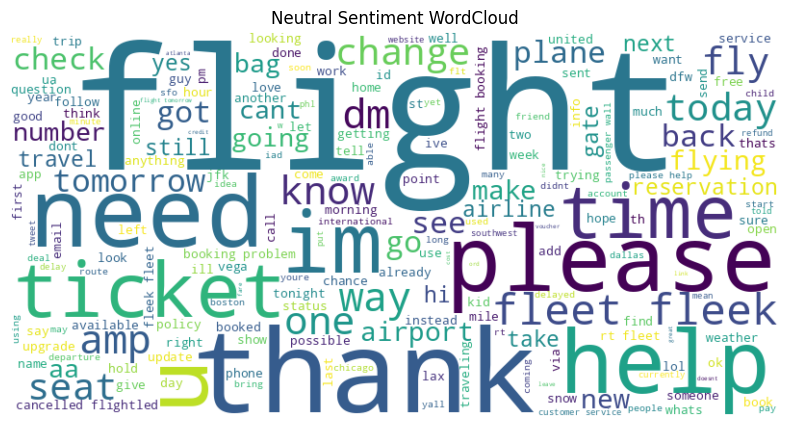

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 80s 420ms/step - accuracy: 0.6038 - loss: 0.9529 - val_accuracy: 0.6452 - val_loss: 0.8977
Epoch 2/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 75s 408ms/step - accuracy: 0.6248 - loss: 0.9283 - val_accuracy: 0.6452 - val_loss: 0.8953
Epoch 3/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 82s 406ms/step - accuracy: 0.6214 - loss: 0.9271 - val_accuracy: 0.6452 - val_loss: 0.8957
Epoch 4/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 74s 407ms/step - accuracy: 0.6274 - loss: 0.9186 - val_accuracy: 0.6452 - val_loss: 0.8967
Epoch 5/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 84s 420ms/step - accuracy: 0.6200 - loss: 0.9264 - val_accuracy: 0.6452 - val_loss: 0.8947
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step
✅ Accuracy: 0.6451502732240437
              precision    recall  f1-score   support

    negative       0.65      1.00      0.78      1889
     neutral       0.00      0.00      0.00       580
    positive       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macr

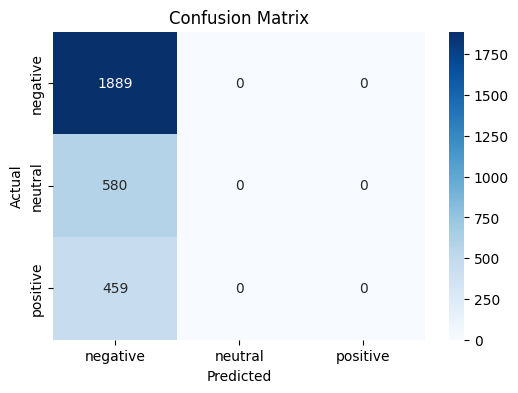

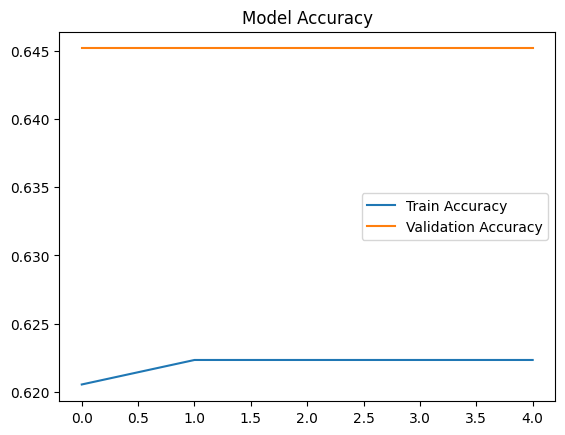

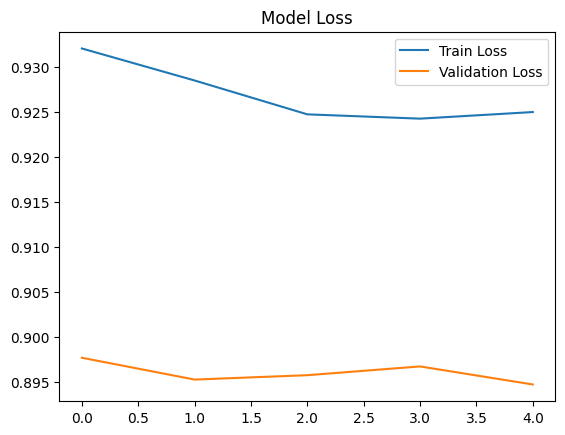

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install scikit-learn
!pip install wordcloud
!pip install nltk


import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv("/content/drive/MyDrive/Study materials/Tweets.csv")

data = data.rename(columns={'airline_sentiment': 'sentiment', 'text': 'clean_text'})

print(data[['sentiment', 'clean_text']].head())

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['clean_text'] = data['clean_text'].apply(clean_text)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    return " ".join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])

data['clean_text'] = data['clean_text'].apply(preprocess)

sns.countplot(x='sentiment', hue='sentiment', data=data, palette="Set2", legend=False)
plt.title("Sentiment Distribution")
plt.show()

positive_words = " ".join(data[data['sentiment'] == 'positive']['clean_text'])
plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.imshow(wc, interpolation="bilinear")
plt.title("Positive Sentiment WordCloud")
plt.axis("off")
plt.show()

negative_words = " ".join(data[data['sentiment'] == 'negative']['clean_text'])
plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="white").generate(negative_words)
plt.imshow(wc, interpolation="bilinear")
plt.title("Negative Sentiment WordCloud")
plt.axis("off")
plt.show()

neutral_words = " ".join(data[data['sentiment'] == 'neutral']['clean_text'])
plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="white").generate(neutral_words)
plt.imshow(wc, interpolation="bilinear")
plt.title("Neutral Sentiment WordCloud")
plt.axis("off")
plt.show()

X = data['clean_text'].values
y = data['sentiment'].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)

y_pred = model.predict(X_test).argmax(axis=1)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.classes_, zero_division=0))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()
